<a href="https://colab.research.google.com/github/MariaDimopoulou/MovieGenreClassificationNLP/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


Firstly, we read the csv file and we make a visualization of the count of each genre that appears in our dataset.

Shape = (54214, 4)


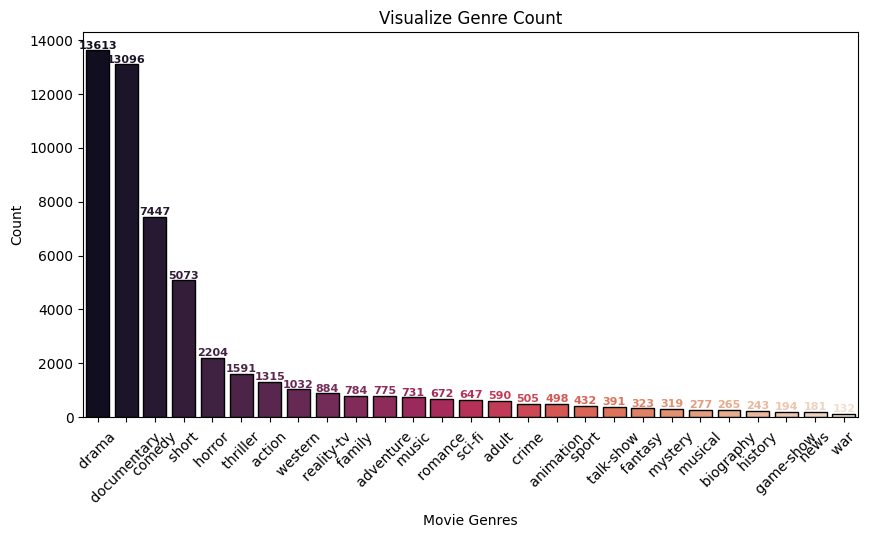

In [49]:
data = pd.read_csv('train_data.txt', sep=':::', names=['ID','Title','Genre','Description'], engine='python')
plt.figure(figsize=(10,5))
my_plot=sns.countplot(x='Genre',data=data,order= data['Genre'].value_counts().index,palette='rocket',edgecolor=(0,0,0))
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Visualize Genre Count')
print("Shape = {}".format(shape))

for idx, value in enumerate(data['Genre'].value_counts()):
    my_plot.text(idx, value + 0.1, str(value), ha='center', va='bottom', fontsize=8, color=my_plot.patches[idx].get_facecolor(), weight='bold')

plt.show()


*Drama is the most frequent genre in our dataset.*

*For our data to be perfect we should have more data available so that they could be balanced. This means that all the genres should be equally represented in our dataset. This is not the case so we will see if this causes trouble in the next steps.*

Checking our data shape and if we have any missing values.

In [50]:
#Shape of our DataFrame
shape=data.shape
print(shape)
#Missing Values
print(data.info())

(54214, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


*The data have no missing values, so we are good to go.*


Turning the Genres from Categorical into Numerical Values.

In [51]:
data['Genre'] = data['Genre'].astype('category').cat.codes
print(data.head())

   ID                               Title  Genre  \
0   1       Oscar et la dame rose (2009)       8   
1   2                       Cupid (1997)      24   
2   3   Young, Wild and Wonderful (1980)       1   
3   4              The Secret Sin (1915)       8   
4   5             The Unrecovered (2007)       8   

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


Removing Special Characters & Punctuations from the Descriptions and convert the text to lower case.

In [63]:
descriptions = list(data['Description'])

for i in range(len(descriptions)):
    descriptions[i] = re.sub(r'[^\w\s]', '', descriptions[i])
    descriptions[i]=descriptions[i].lower()

print(descriptions[:3])


[' listening in to a conversation between his doctor and parents 10yearold oscar learns what nobody has the courage to tell him he only has a few weeks to live furious he refuses to speak to anyone except straighttalking rose the lady in pink he meets on the hospital stairs as christmas approaches rose uses her fantastical experiences as a professional wrestler her imagination wit and charm to allow oscar to live life and love to the full in the company of his friends pop corn einstein bacon and childhood sweetheart peggy blue', ' a brother and sister with a past incestuous relationship have a current murderous relationship he murders the women who reject him and she murders the women who get too close to him', ' as the bus empties the students for their field trip to the museum of natural history little does the tour guide suspect that the students are there for more than just another tour first during the lecture films the coeds drift into dreams of the most erotic fantasies one can 